<a href="https://colab.research.google.com/github/kanha638/Clusterify/blob/main/kmeans_and_bisecting_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import math 
from scipy.spatial import distance
from sklearn.metrics import adjusted_rand_score, silhouette_score

#K means Algorithm Code :

**K-Means Algorithm for Clustering**

In [44]:
def my_kmeans(X, k, init_centroids=None, max_iterations = 10, isPlot=False):
  N, f = X.shape
  
  # plot initial centroids which are selected randomly
  if init_centroids == None:
    X1 = np.array(X)
    np.random.shuffle(X1)
    init_centroids = X1[0:k, :]
  else:
    init_centroids = np.array(init_centroids)
  
  centroids = np.array(init_centroids)

  if isPlot:
    plt.title("Initial centroids")
    plt.scatter(X[:, 0], X[:, 1], s = 20)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="*", color = "red", s = 200)
    plt.show()
    
  clusters = np.zeros(N, dtype='int')

  for iter_no in range(max_iterations): # iterates for maximum number of iterations
    # assigning closest centeroid to each data point
  
    distances = distance.cdist(X, centroids)
    clusters = distances.argmin(axis=1)

    # finding the new centroids by taking the mean value
    if isPlot:
      plt.title("result after iteration " + str(iter_no))
      plt.scatter(X[:, 0], X[:, 1], c=clusters, s=20)
      plt.scatter(centroids[:, 0], centroids[:, 1], marker = "*", s = 200, color = "red")
    
    new_centroids = np.zeros((k, f))
    for cluster_no in range(k):
      points = X[np.where(clusters==cluster_no)]
      new_centroids[cluster_no] = np.mean(points, axis = 0)

    # scatter plot of each iteration
    if isPlot:
      plt.scatter(new_centroids[:, 0], new_centroids[:, 1], marker = "o", s = 100, color = "blue")
      plt.show()
    
    # calculating difference between previous centroids and new centroids
    diff = (new_centroids - centroids).sum()

    centroids = new_centroids

    # if there is no change in the previous centroids and new centroids then loop will terminated
    if diff == 0:
      break
    
  return clusters, init_centroids, centroids

**SSE FINDER FOR SYNTHETIC DATASET**

In [45]:
def SSE_Finder_Sinthetic(X,cluster,centroids):
  for i in range(len(centroids)):
    curr_centroid1 = centroids[i,:]
    cluster_val = X[X.cluster==i]
    cluster_val = np.array(cluster_val)
    sse = 0
    for row in cluster_val:
      point = row[:-2]
      sse = sse + (math.dist(point,curr_centroid1)**2) # adding the euclidean distance's square to the overall sse
    return sse


SSE Finder For A React DataSet

In [46]:
def SSE_Finder(X,cluster,centroids):
  for i in range(len(centroids)):
    curr_centroid1 = centroids[i,:]
    cluster_val = X[X.cluster==i]
    cluster_val = np.array(cluster_val)
    sse = 0
    for row in cluster_val:
      point = row[:-1]
      sse = sse + (math.dist(point,curr_centroid1)**2) # adding the euclidean distance's square to the overall sse
    return sse


Bisecting K Means Algoithm

In [151]:
def bisecting_k_means(X,K=7,isPlot = False,showSSE = False,showFinal = False):
  tmp = X.shape[0]
  initial_cluster = np.zeros(tmp,dtype=int,order='C')
  X['cluster1'] = initial_cluster
  curr = 0
  sse_array = []
  global_centroids = []

  for i in range(K):
    sse_array.append(-1)
    
  sse_array = np.array(sse_array)
  total_clusters = 1
  next = 0
  for i in range(K):
    value = X[X.cluster1==curr]
    value = np.array(value)
    value = value[:,0:2]
    clusters, init_centroids, centroids2 = my_kmeans(value, 1 if i==0 else 2, init_centroids=None, max_iterations=20, isPlot=False)

    if i==0 :
      global_centroids.append(np.array(centroids2[0,:]))
    else :
      global_centroids.append(np.array(centroids2[1,:]))
      global_centroids[curr] = np.array(centroids2[0,:])

    tmp1 = 0
    for m in range(len(clusters)):
      if clusters[m]==0 :
        clusters[m] = curr
      else :
        clusters[m] = next
    next+= 1
    for cl in range(len(initial_cluster)) : 
      if initial_cluster[cl]==curr : 
        initial_cluster[cl] = clusters[tmp1]
        tmp1+=1
    X['cluster1'] = initial_cluster
    ls1 = [curr,next-1]
    for j in range(len(ls1)):
      curr_centroid1 = [centroids2[j if i!=0 else 0,:][0],centroids2[j if i!=0 else 0,:][1]]
      cluster_val = X[X.cluster1==ls1[j]]
      cluster_val = np.array(cluster_val)
      sse = 0
      for row in cluster_val:
        point = row[:-1]
        sse = sse + (math.dist(point,curr_centroid1)**2) # adding the euclidean distance's square to the overall sse
      sse_array[ls1[j]] = sse
    mx = -1
    idx = 0
    for k in range(K):
      if sse_array[k] != -1: 
        if mx < sse_array[k]:
          idx = k
          mx = sse_array[k]

    curr = idx
    if isPlot == True : 
      plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=initial_cluster, s=20)
      tmp3 = initial_cluster
      np.array(tmp3)
      set(tmp3)
      tmp4 = [0,1]
      np.array(tmp4)
      
      val = np.array(global_centroids)
      plt.scatter(val[:, 0], val[:, 1], marker = "*", s = 200,color = 'red')
      plt.show()
    if i == K-1 and isPlot==False:
      if showFinal==True:
        # print("\nFinal Clusters After K-Means Bisecting")
        plt.title('Clusters After Bisecting K-Means')
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=initial_cluster, s=20)
        tmp3 = initial_cluster
        np.array(tmp3)
        set(tmp3)
        tmp4 = [0,1]
        np.array(tmp4)
        
        val = np.array(global_centroids)
        plt.scatter(val[:, 0], val[:, 1], marker = "*", s = 200,color = 'red')
        plt.show()

    if showSSE == True:
      print("SSE FOR THIS ROUND : ")
      for k in range(K):
        if sse_array[k] != -1:
          print('Cluster No : '+ str(k)+" : "+ str(sse_array[k]))
      print('\n\n')
  final_sse = 0
  for val in sse_array:
    final_sse += val

  return initial_cluster ,  np.array(global_centroids) ,final_sse

In [60]:
#Loading the first dataset the clustering
df1 = pd.read_csv("/content/drive/MyDrive/Data Clustering/LAB-01/Datasets/Synthetic/corners.txt",sep='\t',header=None)
df1.head(10)

,0,1,2
0,9.448679,3.711544,1
1,10.922672,3.341594,1
2,4.426034,3.047184,1
3,3.295970,2.597631,1
4,4.250679,3.407938,1
5,5.500139,2.763222,1
6,4.870846,3.135370,1
7,11.274880,3.775722,1
8,2.513138,3.685899,1
9,7.926668,3.797597,1


**Creating DataFrame to Numpy Array**

In [61]:
x = df1.iloc[:,:-1]
labels = df1.iloc[:,-1]
x = np.array(x)
labels = np.array(labels,dtype=int)
x.shape,len(labels)


((1000, 2), 1000)

**Getting Total number of labels for this synthetic dataset**

In [62]:
classes = set(labels)
classes

{1, 2, 3, 4}

**Plotting the Graph with the help of given labels in this synthetic dataset**

In [ ]:
# Since this is a sinthetic dataset there is label associated with it
plt.title('Dataset with ground truth')
plt.scatter(x[:, 0], x[:, 1], c=labels)
plt.show()

In [64]:
k = len(classes)
N,f = x.shape
k,N,f

(4, 1000, 2)

In [ ]:
clusters, init_centroids, centroids = my_kmeans(x, k, init_centroids=None, max_iterations=20, isPlot=True)

In [67]:
df1['cluster'] = clusters
sse_df1_kmeans = SSE_Finder_Sinthetic(df1,clusters,centroids)
si_df1_kmeans = silhouette_score(x,clusters)
ari_df1_kmeans = adjusted_rand_score(labels,clusters)



In [ ]:
# bisecting_k_means(df1,7,True)
x_bisecting = df1.iloc[:,:-2] # Only have to provide the relevant data feilds which will be used in clustering
cluster_bisecting_df1,centroids_bisecting_df1 , sse_bisecting_df1  = bisecting_k_means(x_bisecting,k,True)

In [71]:
sse_df1_kmeans_bisecting = sse_bisecting_df1
si_df1_kmeans_bisecting = silhouette_score(x_bisecting,cluster_bisecting_df1)
ari_df1_kmeans_bisecting = adjusted_rand_score(labels,cluster_bisecting_df1)





/content/drive/MyDrive/Data Clustering/LAB-01/Datasets/Synthetic/D31_k=31.txt
Size of Data Set : 31 3100 2
Ground Truth of the given Data-set


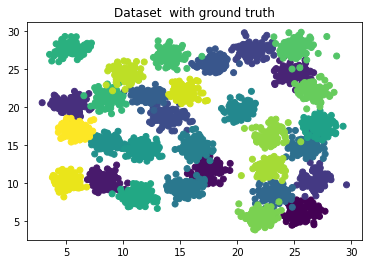

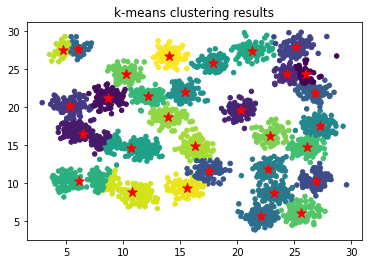

Values of k mean clustering 
SSE : 49.28804528682927
SI : 0.5385063364092421
ARI : 0.8601750123056975


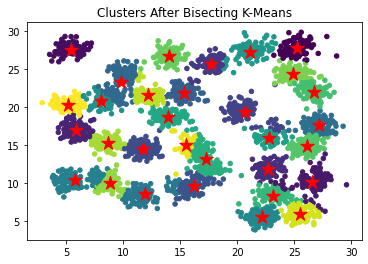

Values of Bisecting K Means clustering 
SSE : 558.4259352926967
SI : 0.48978886459079746
ARI : 0.8189105468281732



/content/drive/MyDrive/Data Clustering/LAB-01/Datasets/Synthetic/full_moon_k=2.txt
Size of Data Set : 2 1000 2
Ground Truth of the given Data-set


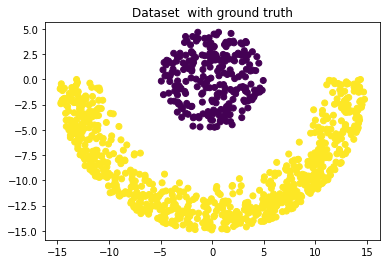

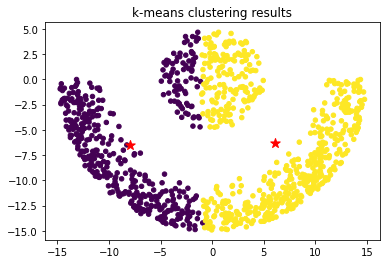

Values of k mean clustering 
SSE : 18873.09652204312
SI : 0.42771667145685377
ARI : -0.002177586877683447


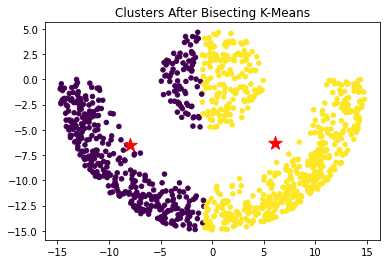

Values of Bisecting K Means clustering 
SSE : 18874.19754485652
SI : 0.42745763061484243
ARI : -0.0016569076856158195



/content/drive/MyDrive/Data Clustering/LAB-01/Datasets/Synthetic/flame_k=2.txt
Size of Data Set : 2 240 2
Ground Truth of the given Data-set


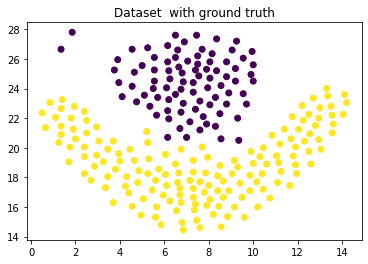

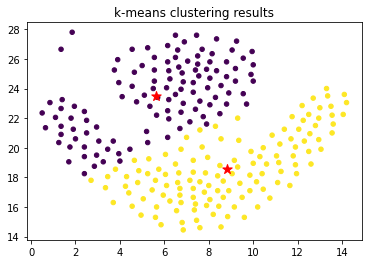

Values of k mean clustering 
SSE : 1414.3048464912274
SI : 0.37987921526594864
ARI : 0.4534129232216995


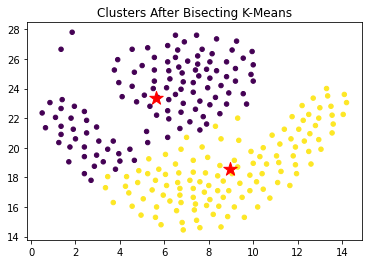

Values of Bisecting K Means clustering 
SSE : 1416.9050567365705
SI : 0.37886360803820956
ARI : 0.43119147182018985



/content/drive/MyDrive/Data Clustering/LAB-01/Datasets/Synthetic/jain_k=2.txt
Size of Data Set : 2 373 2
Ground Truth of the given Data-set


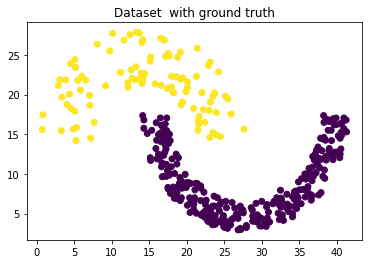

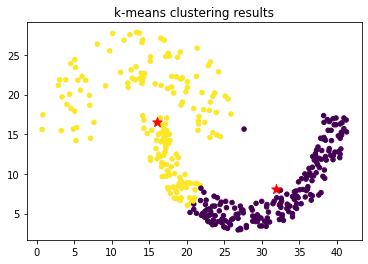

Values of k mean clustering 
SSE : 10432.087087628859
SI : 0.49507179005660795
ARI : 0.3003519309442979


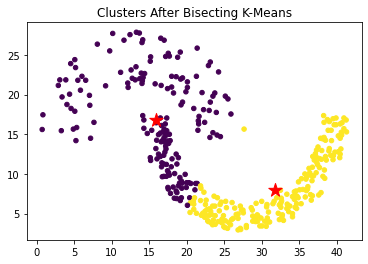

Values of Bisecting K Means clustering 
SSE : 74656.99418840816
SI : 0.49523111081717575
ARI : 0.32410804461158343



/content/drive/MyDrive/Data Clustering/LAB-01/Datasets/Synthetic/R15_k=15.txt
Size of Data Set : 15 600 2
Ground Truth of the given Data-set


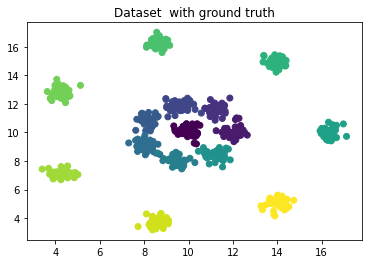

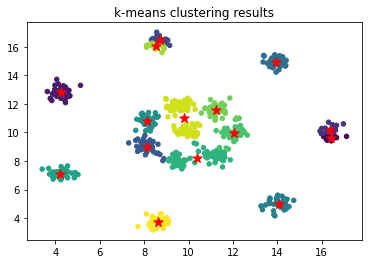

Values of k mean clustering 
SSE : 1.2883184444444415
SI : 0.5975445077600695
ARI : 0.8109759861893483


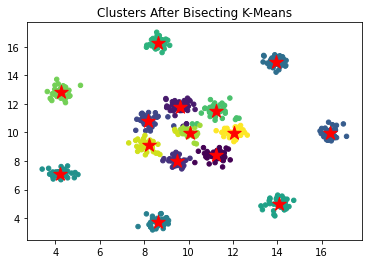

Values of Bisecting K Means clustering 
SSE : 513.9473060630579
SI : 0.7258532615751138
ARI : 0.9412427599957113



/content/drive/MyDrive/Data Clustering/LAB-01/Datasets/Synthetic/g12_k=3.txt
Size of Data Set : 3 300 2
Ground Truth of the given Data-set


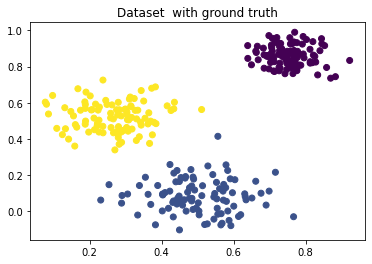

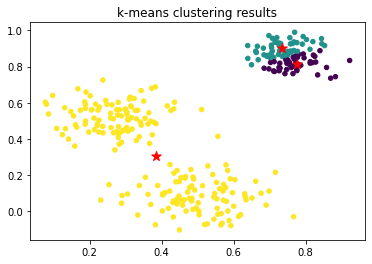

Values of k mean clustering 
SSE : 0.17219335191304355
SI : 0.44337285705641943
ARI : 0.44280469244001747


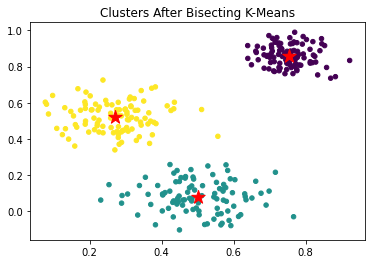

Values of Bisecting K Means clustering 
SSE : 0.30155546573088077
SI : 0.7267298386921159
ARI : 0.9899831669528851



/content/drive/MyDrive/Data Clustering/LAB-01/Datasets/Synthetic/g13_k=3.txt
Size of Data Set : 3 1800 2
Ground Truth of the given Data-set


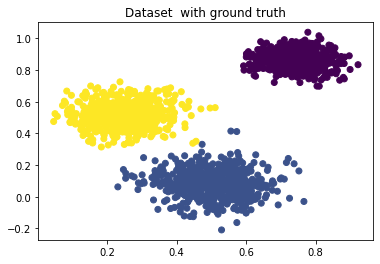

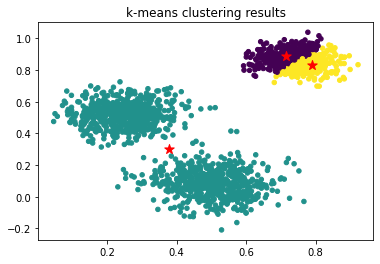

Values of k mean clustering 
SSE : 1.4043958262622356
SI : 0.4542837962856117
ARI : 0.4454396518321062


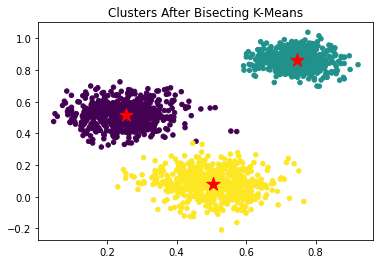

Values of Bisecting K Means clustering 
SSE : 117.83304376008097
SI : 0.7524821631393487
ARI : 0.9950069514011177



/content/drive/MyDrive/Data Clustering/LAB-01/Datasets/Synthetic/Aggregation_k=7.txt
Size of Data Set : 7 788 2
Ground Truth of the given Data-set


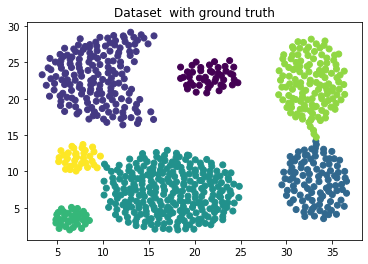

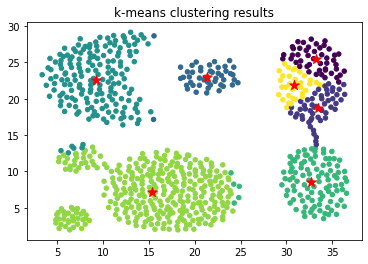

Values of k mean clustering 
SSE : 256.7370212765958
SI : 0.46625742594802694
ARI : 0.7597895345210164


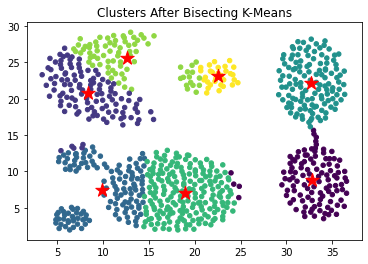

Values of Bisecting K Means clustering 
SSE : 13195.164613037621
SI : 0.43127910147248566
ARI : 0.686818197394997



/content/drive/MyDrive/Data Clustering/LAB-01/Datasets/Synthetic/corners.txt
Size of Data Set : 4 1000 2
Ground Truth of the given Data-set


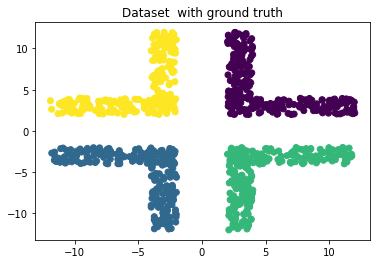

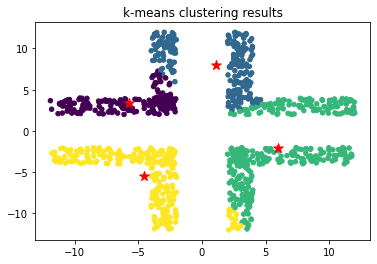

Values of k mean clustering 
SSE : 1771.2593211540075
SI : 0.3976553113354911
ARI : 0.6275034282919087


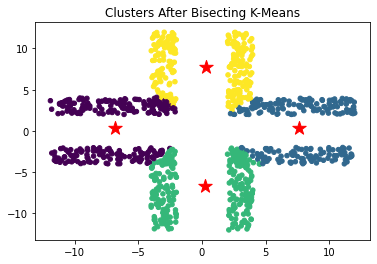

Values of Bisecting K Means clustering 
SSE : 3688.6813155652717
SI : 0.391024215373433
ARI : 0.340834364900841



/content/drive/MyDrive/Data Clustering/LAB-01/Datasets/Synthetic/curves2.txt
Size of Data Set : 2 1000 2
Ground Truth of the given Data-set


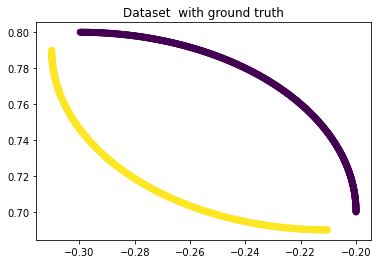

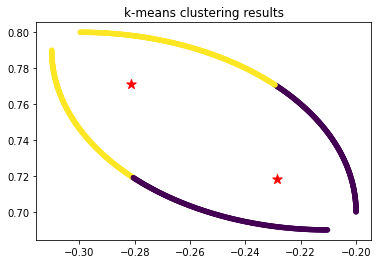

Values of k mean clustering 
SSE : 0.5973529823928093
SI : 0.46598819682063636
ARI : -0.0009979959879839841


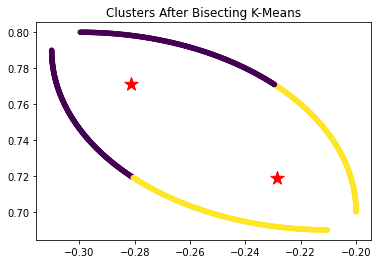

Values of Bisecting K Means clustering 
SSE : 3.3787920961594233
SI : 0.46598896378154125
ARI : -0.0009859879759519037



/content/drive/MyDrive/Data Clustering/LAB-01/Datasets/Synthetic/spiral.txt
Size of Data Set : 3 312 2
Ground Truth of the given Data-set


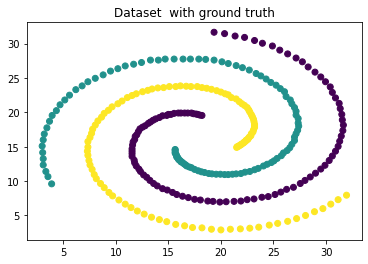

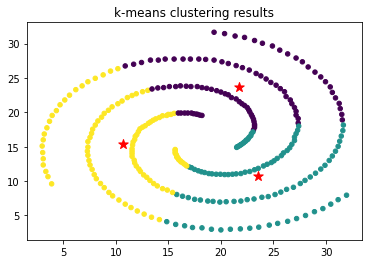

Values of k mean clustering 
SSE : 3752.278645833335
SI : 0.36018526144152485
ARI : -0.005741309045456133


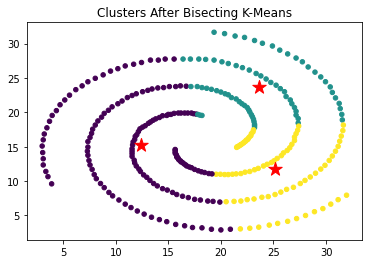

Values of Bisecting K Means clustering 
SSE : 18815.563131163726
SI : 0.3220942814692497
ARI : -0.00487914097976377



/content/drive/MyDrive/Data Clustering/LAB-01/Datasets/Synthetic/cinc_k=2.txt
Size of Data Set : 2 170 2
Ground Truth of the given Data-set


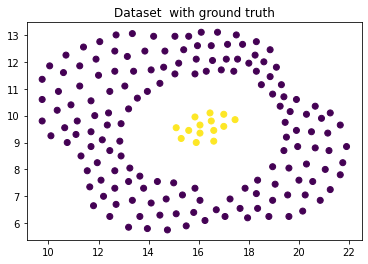

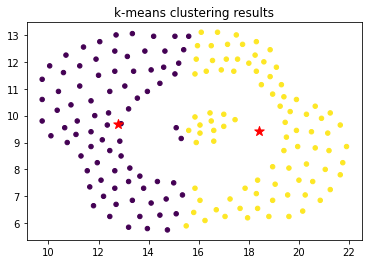

Values of k mean clustering 
SSE : 581.6276829268292
SI : 0.43293044838051375
ARI : 0.004137433525268184


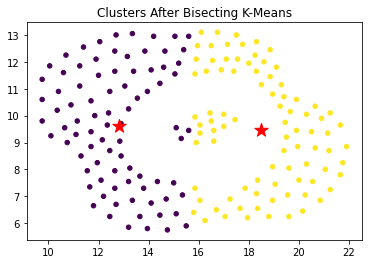

Values of Bisecting K Means clustering 
SSE : 582.1749666950113
SI : 0.43285617183618014
ARI : 0.0049062718357709085


In [156]:
import glob
for file in glob.glob('/content/drive/MyDrive/Data Clustering/LAB-01/Datasets/Synthetic/*.txt'):
  
  if file=='/content/drive/MyDrive/Data Clustering/LAB-01/Datasets/Synthetic/DS2_class_k=9.txt' or file =='/content/drive/MyDrive/Data Clustering/LAB-01/Datasets/Synthetic/varry_dense.txt' :
    continue
  df = pd.read_csv(str(file),sep='\t',header=None)
  # print(df.head(3))
  x = df.iloc[:,:-1]
  labels = df.iloc[:,-1]
  x = np.array(x)
  labels = np.array(labels)
  x.shape,len(labels)
  classes = set(labels)
  k = len(classes)
  N,f = x.shape
  k,N,f
 
  print('\n\n')
  print(file)
  print("Size of Data Set : "+str(k)+" "+str(N)+" "+str(f))
  print("Ground Truth of the given Data-set")
  plt.title('Dataset  with ground truth')
  plt.scatter(x[:, 0], x[:, 1], c=labels)
  plt.show()

  # Now Doing The K Means Algorithm for the dataset 
  final_clusters =[]
  final_centroids = []
  min_sse = 9223372036854775807 
  for i in range(10):
     clusters, init_centroids, centroids = my_kmeans(x, k, init_centroids=None, max_iterations=20, isPlot=False)
     df['cluster'] = clusters
     curr_sse = SSE_Finder_Sinthetic(df,clusters,centroids)
     if curr_sse < min_sse : 
       min_sse = curr_sse
       final_clusters = clusters
       final_centroids = centroids
  
  df['cluster'] = final_clusters


 
  plt.title("k-means clustering results")
  plt.scatter(x[:, 0], x[:, 1], c=final_clusters, s=20)
  plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker = "*", s = 100, color = "red")
  plt.show()
  # print(final_centroids)
  
  sse_df_kmeans = SSE_Finder_Sinthetic(df,final_clusters,final_centroids)
  si_df_kmeans = silhouette_score(x,final_clusters)
  ari_df_kmeans = adjusted_rand_score(labels,final_clusters)
  print("Values of k mean clustering ")
  print("SSE : "+str(sse_df_kmeans))
  print("SI : "+str(si_df_kmeans))
  print("ARI : "+str(ari_df_kmeans))
  x_bisecting = df.iloc[:,:-2] # Only have to provide the relevant data feilds which will be used in clustering
  # print(x_bisecting)
  cluster_bisecting_df,centroids_bisecting_df , sse_bisecting_df  = bisecting_k_means(x_bisecting,k,False,False,True)
  # print('df final centroid : ')
  # print(centroids_bisecting_df)
  sse_df_kmeans_bisecting = SSE_Finder_Sinthetic(df,final_clusters,centroids_bisecting_df)
  si_df_kmeans_bisecting = silhouette_score(x,cluster_bisecting_df)
  ari_df_kmeans_bisecting = adjusted_rand_score(labels,cluster_bisecting_df)
  print("Values of Bisecting K Means clustering ")
  print("SSE : "+str(sse_df_kmeans_bisecting))
  print("SI : "+str(si_df_kmeans_bisecting))
  print("ARI : "+str(ari_df_kmeans_bisecting))




  
  











Data-Set -> 2

In [88]:
df2 = pd.read_csv('/content/drive/MyDrive/Data Clustering/LAB-01/Datasets/Synthetic/corners.txt',sep='\t',header=None)
df2.head()

,0,1,2
0,9.448679,3.711544,1
1,10.922672,3.341594,1
2,4.426034,3.047184,1
3,3.295970,2.597631,1
4,4.250679,3.407938,1


In [92]:
x2 = df2.iloc[:,:-1]
labels2 = df2.iloc[:,-1]
x2 = np.array(x2)
labels2 = np.array(labels2,dtype=int)
x2.shape,len(labels2)


((1000, 2), 1000)

In [120]:
classes_df2 = set(labels2)
classes_df2

{1, 2, 3, 4}

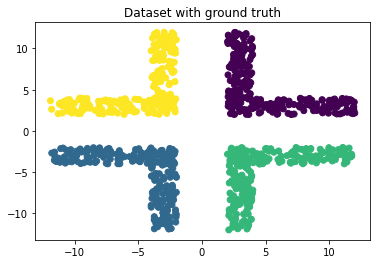

In [94]:
# Since this is a sinthetic dataset there is label associated with it
plt.title('Dataset with ground truth')
plt.scatter(x2[:, 0], x2[:, 1], c=labels2)
plt.show()

In [121]:
k_df2 = len(classes_df2)
N_df2,f_df2 = x2.shape
k_df2,N_df2,f_df2


(4, 1000, 2)

In [ ]:
clusters_df2, init_centroids_df2, centroids_df2 = my_kmeans(x2, k_df2, init_centroids=None, max_iterations=20, isPlot=True)

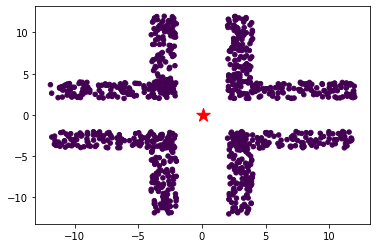

SSE FOR THIS ROUND : 
Cluster No : 0 : 68409





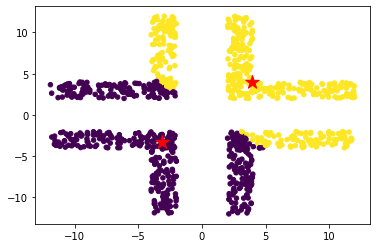

SSE FOR THIS ROUND : 
Cluster No : 0 : 22990
Cluster No : 1 : 19588





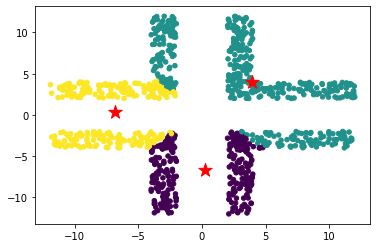

SSE FOR THIS ROUND : 
Cluster No : 0 : 4996
Cluster No : 1 : 19588
Cluster No : 2 : 4410





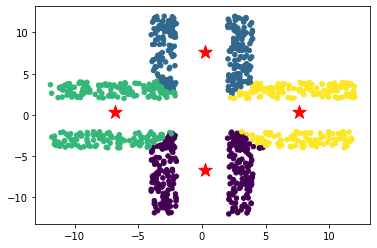

SSE FOR THIS ROUND : 
Cluster No : 0 : 4996
Cluster No : 1 : 3743
Cluster No : 2 : 4410
Cluster No : 3 : 3712



16861


In [140]:
bisecting_data2 = df2.iloc[:,:-1]

cluster_bisecting_df2,centroids_bisecting_df2 , sse_bisecting_df2 = bisecting_k_means(bisecting_data2,4,True)
